This code demonstrates how vertical and horizontal filters work. 

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline


np.random.seed(500)

im = Image.open("../img/lena.png")
# pix = im.load()
pix_array = np.asarray(im).astype(np.uint8)

The image we are using for this example is as shown.

This image is in the form of a 3 dimensional array with the first two dimensions being the height and width, and the third dimension representing the color channels.

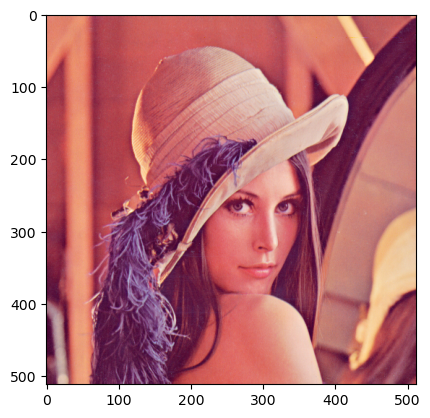

In [2]:
plt.imshow(pix_array)
plt.show()

The function below performs a convolution operation upon a subsection of the image using the filter weights and bias. In this case the bias is zero, but the weights refer to the values of the filter array. 

In [3]:
def convolution_step(slice, W, b):
    s = np.multiply(slice, W)
    Z = np.sum(s)
    Z = (Z + b).item()
    return Z


The function below performs the convolution steps over the whole dataset. This function takes the inputs of either 'horizontal' or 'vertical' to apply the corresponding filter over the dataset.

The sobel versions of the same filters are also implemented, which are improved versions of the normal vertical and horizontal filters.

In [4]:
def edge_detectors(img, type, stride=1, pad=0):
    f = 3 # filter size in this example is fixed to 3
    W = []

    # MATLAB NTSC/PAL Implementation of Greyscale
    greyscale_img = np.round(0.2989*img[:,:,0]
                             + 0.5870*img[:,:,1]
                             + 0.1140*img[:,:,2]).astype(np.uint8)

    n_H_prev,n_W_prev = greyscale_img.shape
    # n_C = greyscale_img.shape[2]

    n_H = int(int((n_H_prev + 2*pad - f)/stride)+1)
    n_W = int(int((n_W_prev + 2*pad - f)/stride)+1)
    Z = np.zeros((n_H, n_W)) # This is the convolution output
    
    if(type == 'horizontal'):
        # Weight vector, which in this case is the convolution
        W = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
    elif(type == 'vertical'):
        W = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    elif(type == 'sobel_horizontal'):
        W = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    elif(type == 'sobel_vertical'):
        W = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

    for h in range(n_H):
        vert_start = stride * h
        vert_end = vert_start + f
        for w in range(n_W):
            horiz_start = stride * w
            horiz_end = horiz_start + f
            a_slice = greyscale_img[vert_start:vert_end, horiz_start:horiz_end]
            Z[h,w] = convolution_step(a_slice, W, 0)
    # mg = Image.fromarray(Z.astype('uint8'))
    # mg.save(f'../img/{type}_edge_detection.png')
    plt.imshow(Z.astype('uint8'))
    plt.show()

Here, the edge detection filter converts the image to greyscale, performing the convolutions on it to emphasize the portions of the image that have a great change in intensity.

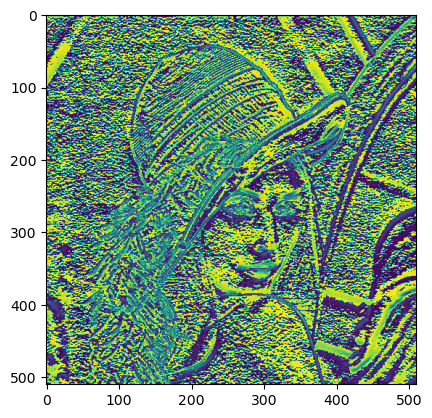

In [5]:
edge_detectors(pix_array, 'horizontal')

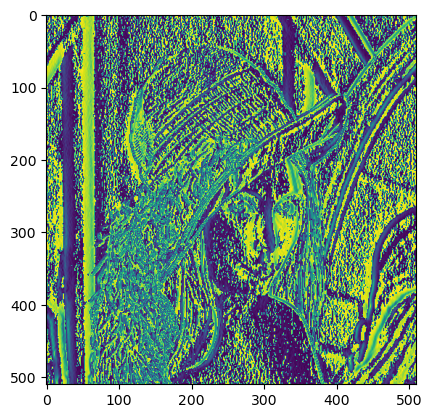

In [6]:
edge_detectors(pix_array, 'vertical')

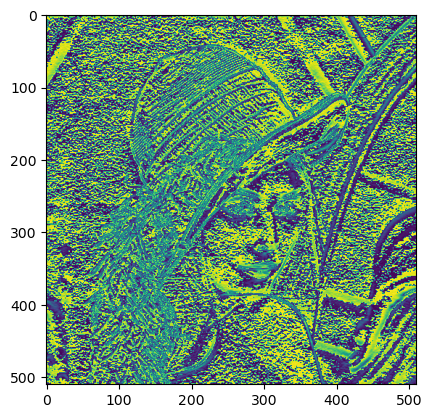

In [7]:
edge_detectors(pix_array, 'sobel_horizontal')

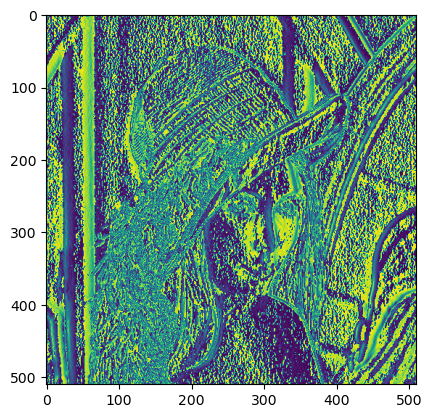

In [8]:
edge_detectors(pix_array, 'sobel_vertical')